In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from helpers import get_topix_data

In [21]:
three_factor_data = pd.read_csv('../data/ff_three_factors_analysis.csv')
portfolio_data = pd.read_csv('../data/CCAReturn.csv')

# カラムの制限
three_factor_data = three_factor_data[['Date', 'Alpha']]
portfolio_data = portfolio_data[['MONTH', 'top_25p', 'top_100p']]

portfolio_data['return'] = portfolio_data['top_25p'] - portfolio_data['top_100p']

In [22]:
three_factor_data['Date'] = pd.to_datetime(three_factor_data['Date'])
portfolio_data['MONTH'] = pd.to_datetime(portfolio_data['MONTH'])

# データの共通期間を取得
start_date = max(three_factor_data['Date'].min(), portfolio_data['MONTH'].min())
end_date = min(three_factor_data['Date'].max(), portfolio_data['MONTH'].max())

# 各データを共通期間でフィルタリング
three_factor_data = three_factor_data[(three_factor_data['Date'] >= start_date) & (three_factor_data['Date'] <= end_date)].reset_index(drop=True)
portfolio_data = portfolio_data[(portfolio_data['MONTH'] >= start_date) & (portfolio_data['MONTH'] <= end_date)].reset_index(drop=True)

# データの期間確認
print("three_factor_data期間:", three_factor_data['Date'].min().strftime('%Y-%m'), "〜", three_factor_data['Date'].max().strftime('%Y-%m'))
print("portfolio_data期間:", portfolio_data['MONTH'].min().strftime('%Y-%m'), "〜", portfolio_data['MONTH'].max().strftime('%Y-%m'))

three_factor_data期間: 2022-01 〜 2024-08
portfolio_data期間: 2022-01 〜 2024-08


In [23]:
# three_factor_dataとportfolio_dataを日付で結合
merged_data = pd.merge(
    three_factor_data, 
    portfolio_data, 
    left_on='Date', 
    right_on='MONTH', 
    how='inner'
)
# データフレームの先頭を表示
display(merged_data.head())

,Date,Alpha,MONTH,top_25p,top_100p,return
0,2022-01-01,0.005382,2022-01-01,-0.072512,-0.064089,-0.008422
1,2022-02-01,0.008263,2022-02-01,0.039363,0.028553,0.010810
2,2022-03-01,0.006874,2022-03-01,0.026638,0.016640,0.009999
3,2022-04-01,0.007239,2022-04-01,-0.006982,-0.021676,0.014694
4,2022-05-01,0.005654,2022-05-01,0.012878,0.002440,0.010438


,Date,Alpha,return
0,2022-01-01,0.005382,-0.008422
1,2022-02-01,0.008263,0.010810
2,2022-03-01,0.006874,0.009999
3,2022-04-01,0.007239,0.014694
4,2022-05-01,0.005654,0.010438


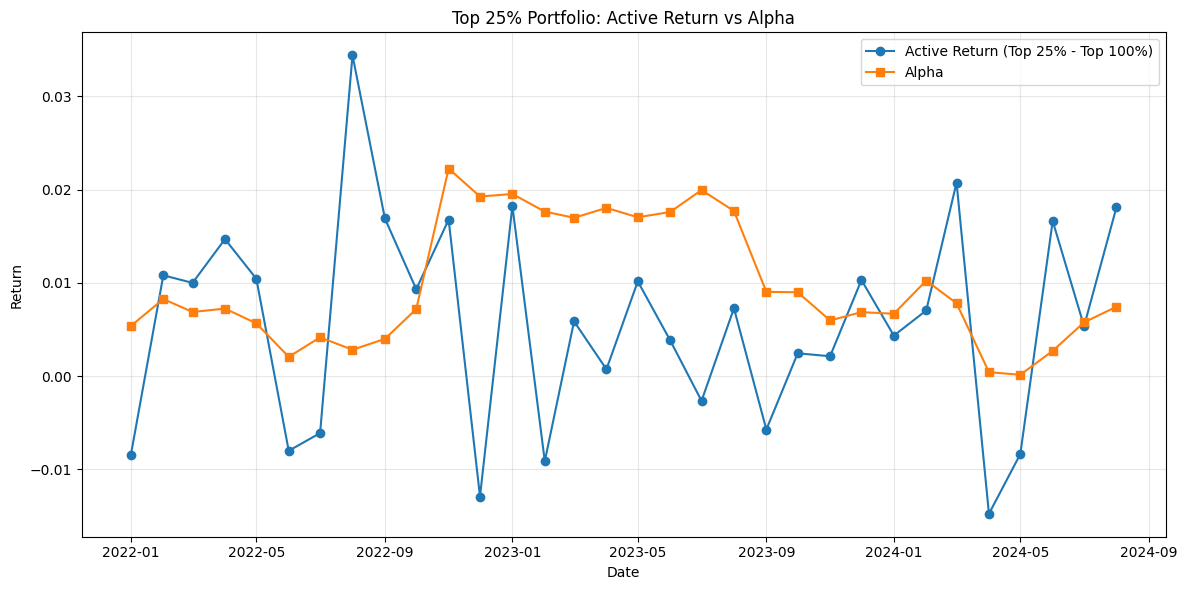

アクティブリターンとAlphaの相関係数: -0.0092


In [24]:
# top_25p - topix_returnと、alphaをグラフで比較
# 必要なカラムを抽出
plot_df = merged_data[['Date', 'Alpha', 'return']].copy()

# データフレームの可視化
display(plot_df.head())

# グラフ描画
plt.figure(figsize=(12, 6))
plt.plot(plot_df['Date'], plot_df['return'], label='Active Return (Top 25% - Top 100%)', marker='o')
plt.plot(plot_df['Date'], plot_df['Alpha'], label='Alpha', marker='s')
plt.title('Top 25% Portfolio: Active Return vs Alpha')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 相関係数の計算と表示
corr = plot_df['return'].corr(plot_df['Alpha'])
print(f"アクティブリターンとAlphaの相関係数: {corr:.4f}")


,Date,Active Return - Alpha
0,2022-01-01,-0.013805
1,2022-02-01,0.002547
2,2022-03-01,0.003125
3,2022-04-01,0.007455
4,2022-05-01,0.004784


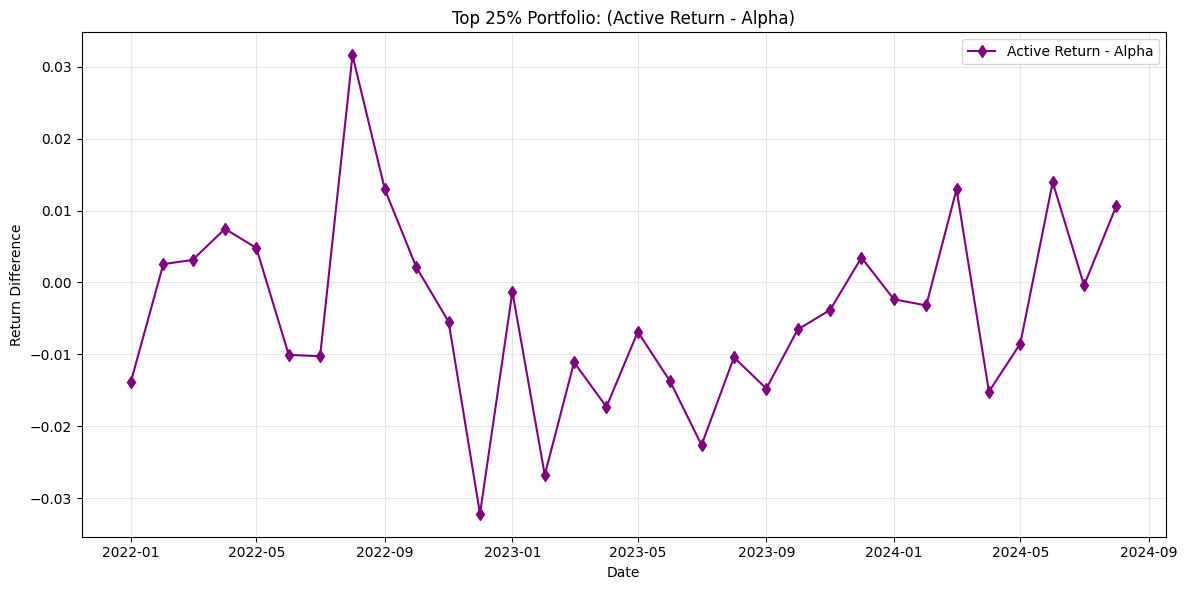

Active Return - Alpha の記述統計量:
count    32.000000
mean     -0.004104
std       0.013044
min      -0.032195
25%      -0.011779
50%      -0.004661
75%       0.003206
max       0.031601
Name: Active Return - Alpha, dtype: float64


In [25]:
# アクティブリターン - Alpha のグラフを描画

# 差分を計算
plot_df['Active Return - Alpha'] = plot_df['return'] - plot_df['Alpha']

# データフレームの可視化
display(plot_df[['Date', 'Active Return - Alpha']].head())

# グラフ描画
plt.figure(figsize=(12, 6))
plt.plot(plot_df['Date'], plot_df['Active Return - Alpha'], label='Active Return - Alpha', marker='d', color='purple')
plt.title('Top 25% Portfolio: (Active Return - Alpha)')
plt.xlabel('Date')
plt.ylabel('Return Difference')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 統計量の表示
print("Active Return - Alpha の記述統計量:")
print(plot_df['Active Return - Alpha'].describe())


In [26]:
top25_tickers = pd.read_csv('../data/top25_tickers.csv')
top25_tickers.head()

,date,ticker1,ticker2,ticker3,ticker4,ticker5,ticker6,ticker7,ticker8,ticker9,...,ticker51,ticker52,ticker53,ticker54,ticker55,ticker56,ticker57,ticker58,ticker59,ticker60
0,2014-01,2432,2651,2670,2685,2730,3028,3048,3092,3099,...,9832,9843,9882,9983,9984,NaN,NaN,NaN,NaN,NaN
1,2014-02,2432,2651,2670,2730,3028,3048,3092,3099,3222,...,9832,9843,9882,9983,9984,NaN,NaN,NaN,NaN,NaN
2,2014-03,2651,2670,2730,3028,3048,3088,3092,3099,3222,...,9843,9882,9983,9984,9989,NaN,NaN,NaN,NaN,NaN
3,2014-04,2651,2670,2685,2730,3028,3048,3092,3099,3222,...,9783,9831,9832,9843,9983,9984.0,NaN,NaN,NaN,NaN
4,2014-05,2651,2670,2685,2730,3028,3048,3092,3099,3222,...,9783,9831,9832,9843,9983,9984.0,NaN,NaN,NaN,NaN


,DATE,TICKER,PRICE,DIVIDENDS,MONTHLY_RETURN
0,2013-01,2138,923.174316,0.0,NaN
1,2013-02,2138,1558.038574,0.0,0.687697
2,2013-03,2138,1587.160767,15.0,0.028319
3,2013-04,2138,1977.104126,0.0,0.245686
4,2013-05,2138,3473.158691,0.0,0.756690


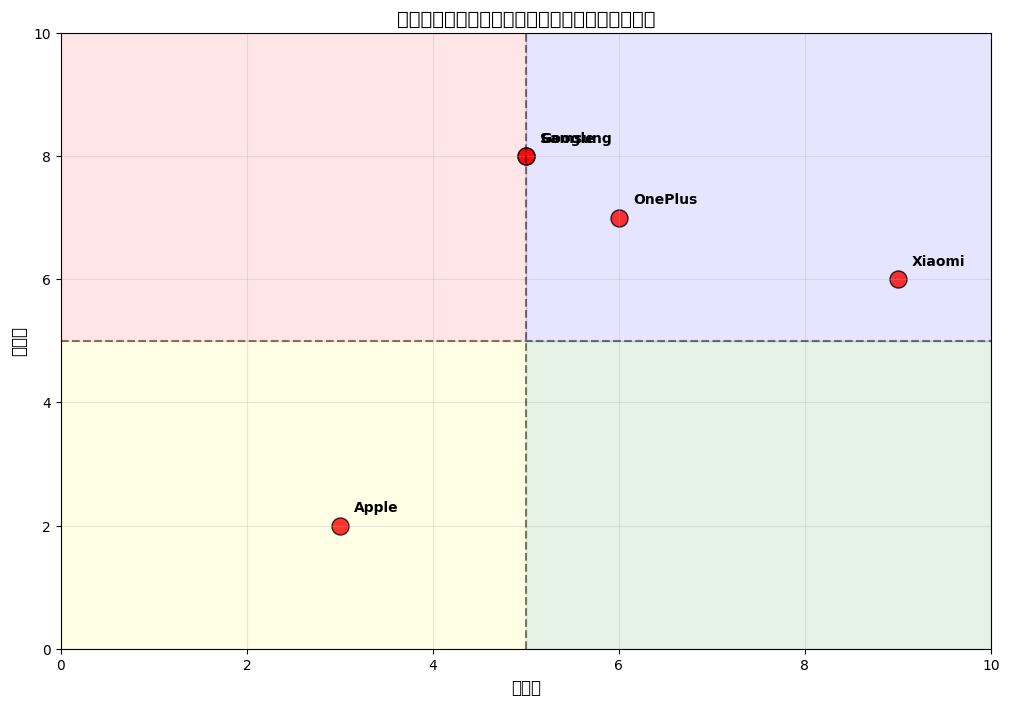

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# データ例
companies = ['Apple', 'Samsung', 'Xiaomi', 'OnePlus', 'Google']
innovation = [2, 8, 6, 7, 8]  # 革新性
affordability = [3, 5, 9, 6, 5]  # 手頃さ

plt.figure(figsize=(12, 8))

# 4象限の背景色を設定
plt.axhspan(5, 10, xmin=0, xmax=0.5, alpha=0.1, color='red', label='高革新・低価格')
plt.axhspan(5, 10, xmin=0.5, xmax=1, alpha=0.1, color='blue', label='高革新・高価格')
plt.axhspan(0, 5, xmin=0, xmax=0.5, alpha=0.1, color='yellow', label='低革新・低価格')
plt.axhspan(0, 5, xmin=0.5, xmax=1, alpha=0.1, color='green', label='低革新・高価格')

# 基準線を描画
plt.axhline(y=5, color='black', linestyle='--', alpha=0.5)
plt.axvline(x=5, color='black', linestyle='--', alpha=0.5)

# データポイントをプロット
plt.scatter(affordability, innovation, s=150, alpha=0.8, c='red', edgecolors='black')

# ラベルを追加
for i, company in enumerate(companies):
    plt.annotate(company, (affordability[i], innovation[i]), 
                xytext=(10, 10), textcoords='offset points',
                fontsize=10, fontweight='bold')

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('手頃さ', fontsize=12)
plt.ylabel('革新性', fontsize=12)
plt.title('スマートフォンブランドのポジショニングマップ', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()